In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import glob
import os
%matplotlib inline 
plt.style.use('fivethirtyeight')

## Contribution - Data Preprocessing

In [2]:
# Look into dropped lines and try to make it less computationally intensive
path = r'Contributions'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1', error_bad_lines=False)
    li.append(df)

contribution_data = pd.concat(li, axis=0, ignore_index=True)

/var/folders/8s/t2_j_2bj0v940314cf44s5k80000gn/T/ipykernel_3452/362555853.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1', error_bad_lines=False)
/var/folders/8s/t2_j_2bj0v940314cf44s5k80000gn/T/ipykernel_3452/362555853.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1', error_bad_lines=False)
/var/folders/8s/t2_j_2bj0v940314cf44s5k80000gn/T/ipykernel_3452/362555853.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1', error_bad_lines=False)
b'Skipping line 11747: expected 17 fields, saw 18

In [3]:
print(contribution_data.head())

  FileNumber  CommitteeType                                   Committee  \
0         17  Regular Party  Indiana Republican State Central Committee   
1         17  Regular Party  Indiana Republican State Central Committee   
2         17  Regular Party  Indiana Republican State Central Committee   
3         17  Regular Party  Indiana Republican State Central Committee   
4         17  Regular Party  Indiana Republican State Central Committee   

  CandidateName ContributorType                           Name  \
0           NaN     Corporation            Aiming Higher, Inc.   
1           NaN     Corporation            Aiming Higher, Inc.   
2           NaN     Corporation           AK Steel Corporation   
3           NaN     Corporation   All Savers Insurance Company   
4           NaN     Corporation  American Trans Airlines, Inc.   

                        Address          City State    Zip Occupation  \
0   47 S. Meridian St, Ste. 200  Indianapolis    IN  46204        NaN   
1  47 

## Contribution - Data Cleaning

In [4]:
contribution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751344 entries, 0 to 1751343
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FileNumber        object 
 1   CommitteeType     object 
 2   Committee         object 
 3   CandidateName     object 
 4   ContributorType   object 
 5   Name              object 
 6   Address           object 
 7   City              object 
 8   State             object 
 9   Zip               object 
 10  Occupation        object 
 11  Type              object 
 12  Description       object 
 13  Amount            float64
 14  ContributionDate  object 
 15  Received_By       object 
 16  Amended           float64
dtypes: float64(2), object(15)
memory usage: 227.1+ MB


<AxesSubplot:title={'center':'Missing Values'}>

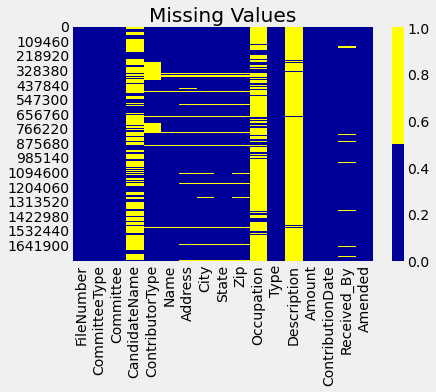

In [5]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

plt.title("Missing Values")
sns.heatmap(contribution_data.isnull(), cmap=sns.color_palette(colours))

In [6]:
for col in contribution_data.columns[:]:
    pct_missing = np.mean(contribution_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

FileNumber - 0%
CommitteeType - 0%
Committee - 0%
CandidateName - 63%
ContributorType - 13%
Name - 2%
Address - 4%
City - 4%
State - 3%
Zip - 5%
Occupation - 79%
Type - 0%
Description - 96%
Amount - 0%
ContributionDate - 0%
Received_By - 6%
Amended - 0%


In [7]:
contribution_data = contribution_data.drop(['FileNumber', 'Occupation', 'Type', 'Amended', 'Description'], axis='columns')

In [ ]:
contribution_data = contribution_data.dropna()
contribution_data

In [ ]:
zipcode = {}
for i in contribution_data['Zip']:
    if i not in zipcode:
        zipcode[i] = 1
    else:
        zipcode[i] += 1

zipcode